In [84]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [85]:
import numpy as np

X, y = mnist["data"], mnist["target"]

y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [86]:
def shift_image_down(image):
    return np.insert(image, 0, values=image[:28])[:-28]


In [87]:
import matplotlib.pyplot as plt

def plot_two_images(image_0, image_1):
    plt.subplot(1, 2, 1)
    plt.imshow(image_0.reshape(28, 28))

    plt.subplot(1, 2, 2)
    plt.imshow(image_1.reshape(28, 28))

In [127]:
import pandas as pd

def clone_shifted_img(img):
    return pd.Series(data=shift_image_down(img.array), index=X_train.columns)

augmentation_number = 10_000 * 2

shifted = X_train.head(augmentation_number).copy().apply(clone_shifted_img, axis=1)

X_train_extended = pd.concat([X_train, shifted])

In [128]:
y_train_extended = pd.Series(np.concatenate([y_train, y_train.head(augmentation_number)]))

In [172]:
from sklearn.neighbors import KNeighborsClassifier

kn_cls = KNeighborsClassifier(n_neighbors=1)

In [173]:
kn_cls.fit(X_train_extended, y_train_extended)

KNeighborsClassifier(n_neighbors=1)

In [205]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, kn_cls.predict(X_test))

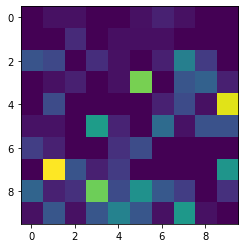

In [206]:
summations = np.sum(matrix, 1, keepdims=True)

result = matrix / summations

np.fill_diagonal(result, 0)

plt.imshow(result)
